In [21]:
# Import tensorflow and print current version
import tensorflow as tf
print(tf.__version__)

2.4.1


In [22]:
# Import rest of libraries used in the code. Usually this is done at the beginning of the document but it can be done at any position
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import SGD, Adagrad, Adadelta
from keras.utils import np_utils
from keras.callbacks import LearningRateScheduler
import os

In [23]:
# Hyperparameters:
# They must be carefully select depending on the dataset and model

NB_EPOCH = 20       # Number of training epochs
VALIDATION_SPLIT=0.2 # Size of the validation split taken from the training set. If your dataset has validation split, skip this part.

Cargamos el dataset:

In [24]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [25]:
PATH_OF_DATA= '/content/gdrive/MyDrive/Curso-Jetson/imagenes/flower_photos'

In [6]:
import pathlib
!mkdir -p PATH_OF_DATA
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(PATH_OF_DATA, origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

In [7]:
!ls '/content/gdrive/MyDrive/Curso-Jetson/imagenes'

flower_photos  flower_photos.tar.gz


In [8]:
 !tar -xvzf '/content/gdrive/MyDrive/Curso-Jetson/imagenes/flower_photos.tar.gz' -C '/content/gdrive/MyDrive/Curso-Jetson/imagenes'

flower_photos/
flower_photos/roses/
flower_photos/roses/14810868100_87eb739f26_m.jpg
flower_photos/roses/1446090416_f0cad5fde4.jpg
flower_photos/roses/15319767030_e6c5602a77_m.jpg
flower_photos/roses/15032112248_30c5284e54_n.jpg
flower_photos/roses/7211616670_2d49ecb3a5_m.jpg
flower_photos/roses/15674450867_0ced942941_n.jpg
flower_photos/roses/17158274118_00ec99a23c.jpg
flower_photos/roses/14019883858_e5d2a0ec10_n.jpg
flower_photos/roses/8035908422_87220425d2_n.jpg
flower_photos/roses/14747962886_2bff6bb323_m.jpg
flower_photos/roses/4356781875_92c5cd93c0.jpg
flower_photos/roses/8524505546_b242bd4928_n.jpg
flower_photos/roses/9406573080_60eab9278e_n.jpg
flower_photos/roses/6039330368_c30ed224c4_m.jpg
flower_photos/roses/14414100710_753a36fce9.jpg
flower_photos/roses/3292434691_392071d702_n.jpg
flower_photos/roses/5273722065_c85d8543c2_m.jpg
flower_photos/roses/2215318403_06eb99176a.jpg
flower_photos/roses/172311368_49412f881b.jpg
flower_photos/roses/15255964454_0a64eb67fa.jpg
flower_pho

In [26]:
!ls '/content/gdrive/MyDrive/Curso-Jetson/imagenes/flower_photos'

daisy  dandelion  LICENSE.txt  roses  sunflowers  tulips


In [27]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/gdrive/MyDrive/Curso-Jetson/imagenes/flower_photos', labels='inferred', subset="training", validation_split=VALIDATION_SPLIT, seed=0)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/gdrive/MyDrive/Curso-Jetson/imagenes/flower_photos', labels='inferred', subset="validation", validation_split=VALIDATION_SPLIT, seed=0)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [28]:
train_ds

<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

Vamos a visualizar una de las muestras y la clase a la que pertenece:

2


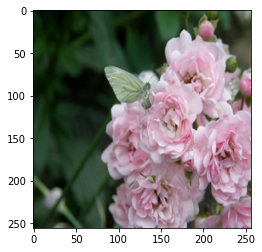

In [29]:
import matplotlib.pyplot as plt
sample = list(train_ds.as_numpy_iterator())[0]    # Tupla con el batch
image = sample[0]                                 # Batch de imagenes
label = sample[1]                                 # Batch de labels
plt.imshow(np.squeeze(image[0])/255.0)
print(label[0])

In [30]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
val_ds = val_ds.map(process)

In [31]:
# Create a pretrained model.
model = tf.keras.applications.ResNet50(
  include_top=False, weights='imagenet', input_shape=(256,256,3), classes=5)

# Add new classification layer
flat = tf.keras.layers.Flatten()(model.output)
out = tf.keras.layers.Dense(5, activation='softmax')(flat)

model = tf.keras.models.Model(inputs=model.inputs, outputs=out)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [40]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds, epochs=NB_EPOCH, validation_data=val_ds)

Epoch 1/20
92/92 [==============================] - 38s 352ms/step - loss: 0.4898 - accuracy: 0.8863 - val_loss: 1.4761 - val_accuracy: 0.6948
Epoch 2/20
92/92 [==============================] - 32s 343ms/step - loss: 0.5222 - accuracy: 0.9099 - val_loss: 2.0567 - val_accuracy: 0.6253
Epoch 3/20
92/92 [==============================] - 32s 342ms/step - loss: 0.3720 - accuracy: 0.9170 - val_loss: 1.6111 - val_accuracy: 0.5640
Epoch 4/20
92/92 [==============================] - 33s 343ms/step - loss: 0.4063 - accuracy: 0.9314 - val_loss: 1.9313 - val_accuracy: 0.6717
Epoch 5/20
92/92 [==============================] - 32s 342ms/step - loss: 0.2231 - accuracy: 0.9484 - val_loss: 1.5601 - val_accuracy: 0.6880
Epoch 6/20
92/92 [==============================] - 33s 345ms/step - loss: 0.5720 - accuracy: 0.9228 - val_loss: 2.2205 - val_accuracy: 0.6226
Epoch 7/20
92/92 [==============================] - 33s 344ms/step - loss: 0.3095 - accuracy: 0.9366 - val_loss: 5.4678 - val_accuracy: 0.5627

In [41]:
model.evaluate(val_ds)

23/23 [==============================] - 4s 136ms/step - loss: 3.3690 - accuracy: 0.5886


[3.368957042694092, 0.5885558724403381]

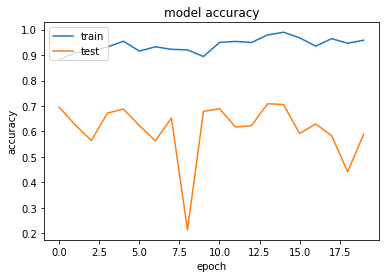

In [42]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

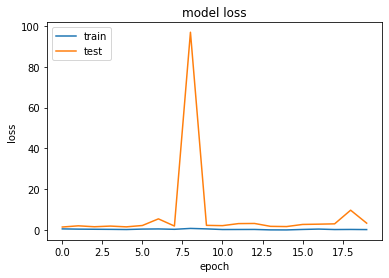

In [43]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [44]:
# Save model
OUT_MODEL_PATH= '/content/gdrive/MyDrive/Curso-Jetson/models'
model.save(os.path.join(OUT_MODEL_PATH, 'model-final-pract2.hdf5'))

In [45]:
!ls $OUT_MODEL_PATH

model-final-pract1.hdf5  model-final-pract2.hdf5
